# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?appid="
api_key = weather_api_key
units = "imperial"
query_url = f"{base_url}{api_key}&units={units}&q="

In [4]:
# Create dictionary to store data from API calls
city_weather_data = {"City": [],
                     "Lat": [],
                     "Lng": [],
                     "Max Temp": [],
                     "Humidity": [],
                     "Cloudiness": [],
                     "Wind Speed": [],
                     "Country": [],
                     "Date": []}

# Loop thru the API call data to add the data retrieved into the dictionary
for i, city in enumerate(cities):
    city = requests.get(query_url + cities[i].replace(" ","&")).json()

    try:
        print(f"Processing city " + str(i) + ": " + city["name"])

        city_weather_data["City"].append(city["name"])
        city_weather_data["Lat"].append(city["coord"]["lat"])
        city_weather_data["Lng"].append(city["coord"]["lon"])
        city_weather_data["Max Temp"].append(city["main"]["temp_max"])
        city_weather_data["Humidity"].append(city["main"]["humidity"])
        city_weather_data["Cloudiness"].append(city["clouds"]["all"])
        city_weather_data["Wind Speed"].append(city["wind"]["speed"])
        city_weather_data["Country"].append(city["sys"]["country"])
        city_weather_data["Date"].append(city["dt"])

    except:
        print(f"Couldn't find data. Pass on city")
        
print("City Data retrieval complete.")

Processing city 0: Mataura
Processing city 1: Ribeira
Processing city 2: Albany
Processing city 3: Auki
Processing city 4: Nanlong
Processing city 5: Mahébourg
Couldn't find data. Pass on city
Processing city 7: Nanortalik
Processing city 8: Westport
Processing city 9: Vardø
Processing city 10: Qaqortoq
Processing city 11: Trelew
Processing city 12: Kaya
Couldn't find data. Pass on city
Couldn't find data. Pass on city
Processing city 15: Vaini
Processing city 16: Port
Processing city 17: Rikitea
Processing city 18: Busselton
Processing city 19: El Puerto de Santa María
Processing city 20: Hobart
Processing city 21: Jiuquan
Processing city 22: Chui
Processing city 23: Punta
Couldn't find data. Pass on city
Processing city 25: Arrondissement de Vannes
Processing city 26: Northam
Processing city 27: Barrow
Processing city 28: Lebu
Processing city 29: Pisco
Processing city 30: Kayerkan
Processing city 31: Tapah
Couldn't find data. Pass on city
Processing city 33: Longyearbyen
Processing c

Processing city 278: Hazorasp
Processing city 279: San
Processing city 280: Opuwo
Processing city 281: Baykit
Processing city 282: Bredasdorp
Processing city 283: Killybegs
Processing city 284: Sakakah
Processing city 285: Aykhal
Processing city 286: Oktyabr'skiy
Processing city 287: Tarko-Sale
Processing city 288: Mackay
Processing city 289: Mys
Couldn't find data. Pass on city
Couldn't find data. Pass on city
Processing city 292: Novo
Processing city 293: Vestmanna
Processing city 294: Ucluelet
Processing city 295: Cap
Processing city 296: Chajul
Processing city 297: Adrar
Processing city 298: Malakal
Processing city 299: Ambanja
Processing city 300: Ludvika
Processing city 301: Piaçabuçu
Processing city 302: Rovaniemi
Processing city 303: Labuhan
Processing city 304: Suez
Processing city 305: Komatipoort
Processing city 306: Burley
Processing city 307: Bogorodskoye
Processing city 308: Kalmunai
Processing city 309: Taltal
Processing city 310: Vostok
Processing city 311: Along
Proces

Processing city 556: Coevorden
Processing city 557: Tommot
Processing city 558: Hirara
Processing city 559: Okha
Processing city 560: Urucará
Couldn't find data. Pass on city
Processing city 562: Bissau
Processing city 563: Natal
Processing city 564: Ballinrobe
Processing city 565: Desbiens
Processing city 566: Victor
Processing city 567: Qinzhou
Processing city 568: Wattegama
Processing city 569: Naranjos
Processing city 570: Monrovia
Processing city 571: Morehead
Processing city 572: Sahāranpur
Processing city 573: Antalaha
Processing city 574: Xai-Xai
Processing city 575: Zhuhai
Processing city 576: Minas
Processing city 577: Cockburn
Processing city 578: Monterey
Couldn't find data. Pass on city
Couldn't find data. Pass on city
Processing city 581: Araripe
Processing city 582: Kansanshi
Processing city 583: Srandakan
Processing city 584: Médéa
Couldn't find data. Pass on city
Processing city 586: Graham
Processing city 587: Paamiut
Processing city 588: Samarai
Processing city 589: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_weather_df = pd.DataFrame(city_weather_data)
city_weather_df.to_csv(output_data_file, index = False)

print(city_weather_df.count())

city_retrieved = city_weather_df["City"].count()
print(f"There's %s cities data retrieved out of {len(cities)} cities." % city_retrieved)


success_rate = round((city_retrieved / len(cities) * 100), 2)
print(f"Success rate is: %s" % success_rate  + "%.")

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64
There's 573 cities data retrieved out of 630 cities.
Success rate is: 90.95%.


In [6]:
city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,70.48,46,86,5.21,NZ,1647664491
1,Ribeira,42.7461,-8.4439,51.73,85,0,3.44,ES,1647664491
2,Albany,42.6001,-73.9662,50.72,78,100,2.10,US,1647664249
3,Auki,-8.7676,160.7034,83.62,74,92,4.14,SB,1647664491
4,Nanlong,31.3533,106.0631,75.85,57,100,8.41,CN,1647664492
...,...,...,...,...,...,...,...,...,...
568,Bač,45.3919,19.2367,26.60,77,21,3.42,RS,1647664637
569,Seoul,37.5683,126.9778,42.37,81,100,13.80,KR,1647664402
570,Cervo,43.6702,-7.4101,50.22,80,9,5.12,ES,1647664637
571,Rajanpur,29.1035,70.3250,92.97,16,0,2.28,PK,1647664638


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
print("By sorting columns by Humidity decending we see that there is no humidity > 100%")
humid_sort = city_weather_df.sort_values(by='Humidity', ascending=False)

humid_sort.head()

By sorting columns by Humidity decending we see that there is no humidity > 100%


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
32,Macaé,-22.3708,-41.7869,74.95,100,0,4.61,BR,1647664453
371,Grindavik,63.8424,-22.4338,32.47,100,100,6.91,IS,1647664587
193,Aras,42.5617,-2.3560,37.81,100,26,4.61,ES,1647664544
123,Kiryat Gat,31.6100,34.7642,54.39,100,32,5.73,IL,1647664525
111,Santarém,-2.4431,-54.7083,73.53,100,75,3.44,BR,1647664522


In [8]:
#  Get the indices of cities that have humidity over 100%.
test_stats = city_weather_df["Humidity"].describe()
print(test_stats)

if city_weather_df["Humidity"].max() <= 100:
    print(f"By showing that there is the exact count of cities (526) we know there are no cities have Humidity over 100%")

count    573.000000
mean      70.944154
std       23.251672
min        1.000000
25%       61.000000
50%       77.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64
By showing that there is the exact count of cities (526) we know there are no cities have Humidity over 100%


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [10]:
lat = city_weather_df["Lat"]
max_temp = city_weather_df["Max Temp"]
humidity = city_weather_df["Humidity"]
cloudiness = city_weather_df["Cloudiness"]
wind_speed = city_weather_df["Wind Speed"]

In [11]:
def plot_scatter(ydata, ylbl, title, save_graph):
    
    plt.scatter(lat, ydata, linewidths = 1, marker = "o", edgecolors = "black", color = "blue")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(ylbl)
    plt.tight_layout()
    plt.grid(True)
    plt.savefig("../output_data/" + save_graph)

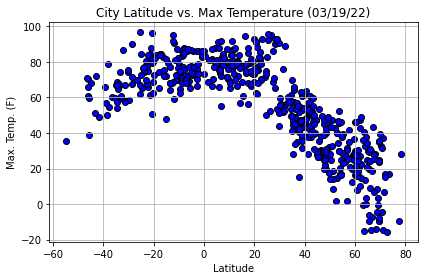

In [12]:
ylbl = "Max. Temp. (F)"
save_graph = "Lat_Temp.png"
title = "City Latitude vs. Max Temperature (%s)" % time.strftime("%x")
plot_scatter(max_temp, ylbl, title, save_graph)

## Latitude vs. Humidity Plot

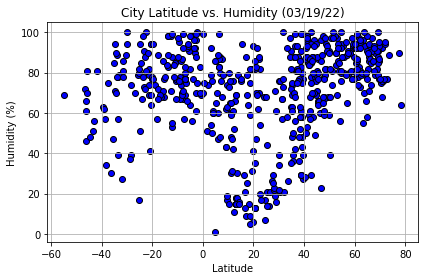

In [13]:
ylbl = "Humidity (%)"
save_graph = "Lat_Humid.png"
title = "City Latitude vs. Humidity (%s)" % time.strftime("%x")
plot_scatter(humidity, ylbl, title, save_graph)

## Latitude vs. Cloudiness Plot

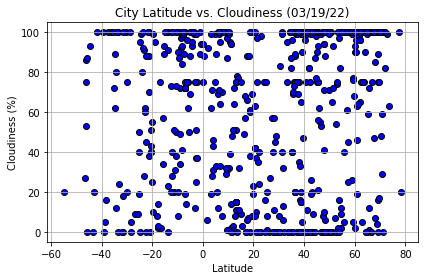

In [14]:
ylbl = "Cloudiness (%)"
save_graph = "Lat_Cloud.png"
title = "City Latitude vs. Cloudiness (%s)" % time.strftime("%x")
plot_scatter(cloudiness, ylbl, title, save_graph)

## Latitude vs. Wind Speed Plot

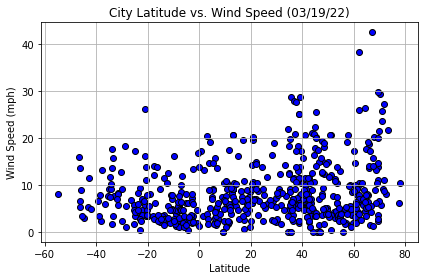

In [15]:
ylbl = "Wind Speed (mph)"
save_graph = "Lat_Wind.png"
title = "City Latitude vs. Wind Speed (%s)" % time.strftime("%x")
plot_scatter(wind_speed, ylbl, title, save_graph)

## Linear Regression

In [16]:
# Create Northern Hemisphere DataFrames
northern_hemisphere = city_weather_df.loc[city_weather_df["Lat"] > 0.0]
northern_hemisphere.reset_index(inplace = True)

# Create Southern Hemisphere DataFrames
southern_hemisphere = city_weather_df.loc[city_weather_df["Lat"] < 0.0]
southern_hemisphere.reset_index(inplace = True)

print(northern_hemisphere.head())
print(southern_hemisphere.head())

   index        City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0      1     Ribeira  42.7461   -8.4439     51.73        85           0   
1      2      Albany  42.6001  -73.9662     50.72        78         100   
2      4     Nanlong  31.3533  106.0631     75.85        57         100   
3      6  Nanortalik  60.1432  -45.2371     16.23        81          90   
4      7    Westport  41.1415  -73.3579     55.31        96         100   

   Wind Speed Country        Date  
0        3.44      ES  1647664491  
1        2.10      US  1647664249  
2        8.41      CN  1647664492  
3        5.21      GL  1647664492  
4        5.99      US  1647664493  
   index       City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0      0    Mataura -46.1927  168.8643     70.48        46          86   
1      3       Auki  -8.7676  160.7034     83.62        74          92   
2      5  Mahébourg -20.4081   57.7000     81.25        94          40   
3     10     Trelew -43.2490  -65.305

In [17]:
nlat = northern_hemisphere["Lat"]
nmax_temp = northern_hemisphere["Max Temp"]
nhumidity = northern_hemisphere["Humidity"]
ncloudiness = northern_hemisphere["Cloudiness"]
nwind_speed = northern_hemisphere["Wind Speed"]

slat = southern_hemisphere["Lat"]
smax_temp = southern_hemisphere["Max Temp"]
shumidity = southern_hemisphere["Humidity"]
scloudiness = southern_hemisphere["Cloudiness"]
swind_speed = southern_hemisphere["Wind Speed"]

In [18]:
def plot_linear_regression(xdata, ydata, ylbl, lblpos, title, save_graph):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    color = "orange"
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(xdata, ydata, linewidths = 1, marker = "o", edgecolors = "black", color = "blue")
    plt.plot(xdata,regress_values, color)
    plt.annotate(line_eq, lblpos, fontsize = 15, color = color)
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(ylbl)
    plt.tight_layout()
    plt.savefig("../output_data/" + save_graph)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8714335158471038


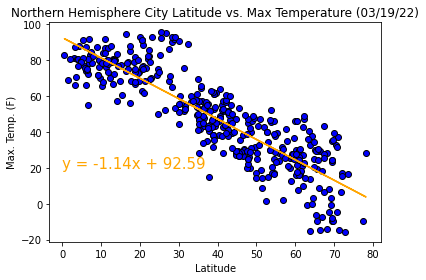

In [19]:
ylbl = "Max. Temp. (F)"
lblpos = (0, 20)
save_graph = "NLat_Temp.png"
title = "Northern Hemisphere City Latitude vs. Max Temperature (%s)" % time.strftime("%x")
plot_linear_regression(nlat, nmax_temp, ylbl, lblpos, title, save_graph)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49007154606964975


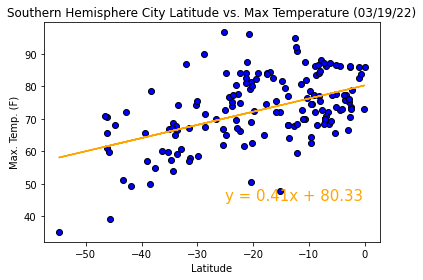

In [20]:
ylbl = "Max. Temp. (F)"
lblpos = (-25, 45)
save_graph = "SLat_Temp.png"
title = "Southern Hemisphere City Latitude vs. Max Temperature (%s)" % time.strftime("%x")
plot_linear_regression(slat, smax_temp, ylbl, lblpos, title, save_graph)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4942007891317416


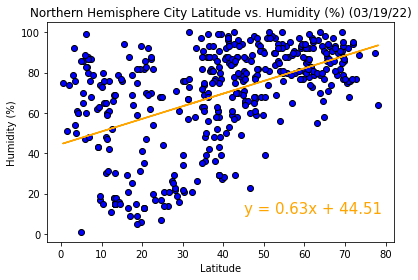

In [21]:
ylbl = "Humidity (%)"
lblpos = (45, 10)
save_graph = "NLat_Humid"
title = "Northern Hemisphere City Latitude vs. Humidity (%%) (%s)" % time.strftime("%x")
plot_linear_regression(nlat, nhumidity, ylbl, lblpos, title, save_graph)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.36224398586201245


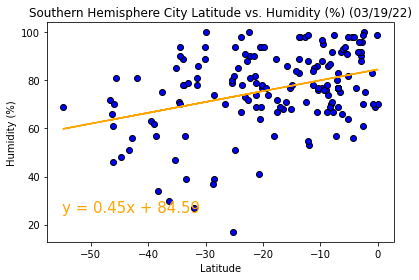

In [22]:
ylbl = "Humidity (%)"
lblpos = (-55, 25)
save_graph = "SLat_Humid"
title = "Southern Hemisphere City Latitude vs. Humidity (%%) (%s)" % time.strftime("%x")
plot_linear_regression(slat, shumidity, ylbl, lblpos, title, save_graph)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20444170080144236


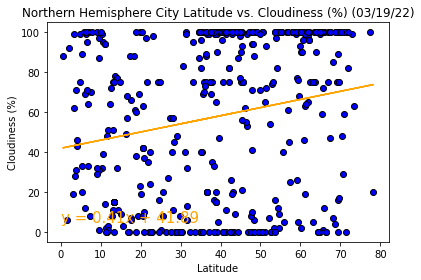

In [23]:
ylbl = "Cloudiness (%)"
lblpos = (0, 5)
save_graph = "NLat_Cloud"
title = "Northern Hemisphere City Latitude vs. Cloudiness (%%) (%s)" % time.strftime("%x")
plot_linear_regression(nlat, ncloudiness, ylbl, lblpos, title, save_graph)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2162139203457606


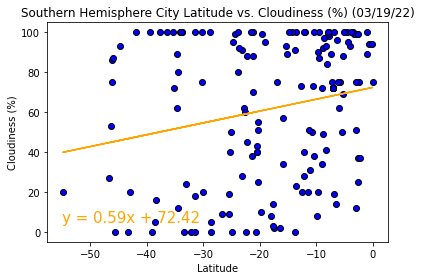

In [24]:
ylbl = "Cloudiness (%)"
lblpos = (-55, 5)
save_graph = "SLat_Cloud"
title = "Southern Hemisphere City Latitude vs. Cloudiness (%%) (%s)" % time.strftime("%x")
plot_linear_regression(slat, scloudiness, ylbl, lblpos, title, save_graph)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1498893786786599


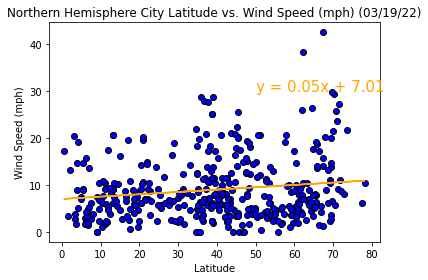

In [25]:
ylbl = "Wind Speed (mph)"
lblpos = (50, 30)
save_graph = "NLat_Wind"
title = "Northern Hemisphere City Latitude vs. Wind Speed (mph) (%s)" % time.strftime("%x")
plot_linear_regression(nlat, nwind_speed, ylbl, lblpos, title, save_graph)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.25517043378565524


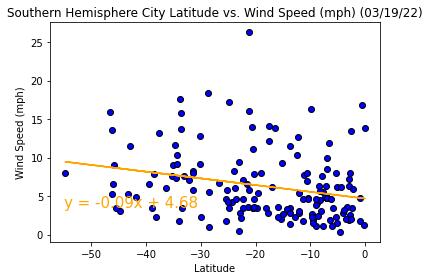

In [26]:
ylbl = "Wind Speed (mph)"
lblpos = (-55, 3.5)
save_graph = "SLat_Wind"
title = "Southern Hemisphere City Latitude vs. Wind Speed (mph) (%s)" % time.strftime("%x")
plot_linear_regression(slat, swind_speed, ylbl, lblpos, title, save_graph)